In [124]:
import itertools
import random as rd
import numpy as np
from scipy.optimize import curve_fit
import collections
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline
import networkx as nx
from IPython.display import Image
from networkx.generators.random_graphs import barabasi_albert_graph

In [ ]:
# Run this only in Colab environment
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = '/content/gdrive/My Drive/<your_gdrivefolder>/data/'
###############################################################
# for local storage
path = '../notebooks_data/data/'

# Assortativity 

## Tutorial:

## fitting procedure with numpy (polyfit)


Often model parameters need to be fitted to real world data.

In this notebook we are going through a simple example first to learn how the fitting procedure works with `numpy.polyfit`.

Note that numpy is only one way of doing it. For more advanced tasks you can use the `scipy.optimize.curve_fit` 
module.
 
It is also not unusual when different fitting implementations lead to slightly different results. In higher-dimensional parameter landscapes there might be multiple minima plus different optimization procedures to minimize the differnce between the data and your model function can lead to inconsistencies.

We will start very simplke by generating a linear function and add some noise to it pretending it was real data.

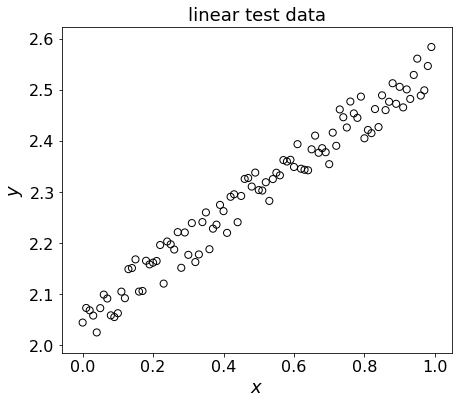

In [5]:
x = np.arange(0,1,.01)

a = .5
b = 2.

y = [(a*z+b)+.1*rd.uniform(0,1) for z in x]

plt.figure(figsize=(7,6))
plt.scatter(x, y, s=50, facecolors='none', edgecolors='k')

plt.title("linear test data",fontsize=18)
plt.ylabel("$y$",fontsize=18)
plt.xlabel("$x$",fontsize=18)
ax = plt.gca()
plt.tick_params(axis='both', which='major', colors='k',labelsize=16)



a=0.49
b=2.05


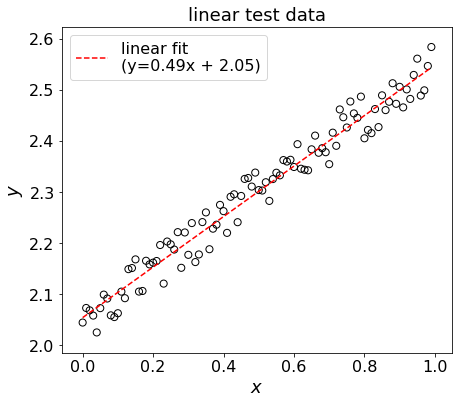

In [6]:
# define model function :
def linear_func(x,a,b):
    return a*x+b

# actual fitting yields optimized parameters a and b
paras = np.polyfit(x, y, 1)
print('a=%.2f' %paras[0])
print('b=%.2f' %paras[1])


x_fit = x
# y_fit = [paras[1]+z*paras[0] for z in x_fit]
y_fit = [linear_func(z,paras[0],paras[1]) for z in x_fit]


plt.figure(figsize=(7,6))
plt.scatter(x, y, s=50, facecolors='none', edgecolors='k')
plt.plot(x_fit,y_fit,'r--',label= 'linear fit \n(y=%.2fx + %.2f)' %(paras[0],paras[1]))
plt.title("linear test data",fontsize=18)
plt.ylabel("$y$",fontsize=18)
plt.xlabel("$x$",fontsize=18)

ax = plt.gca()
plt.tick_params(axis='both', which='major', colors='k',labelsize=16)
plt.legend(fontsize=16)


## Exercise (12pts)

In chapter 7 about `degree correlations` in Barabasi's book you can find Figure 7.6 where for three networks the degree correlation is shown. ([chapter 7](http://networksciencebook.com/chapter/7#measuring-degree))

Recapitulate these three plots.



Consider the three real-world datasets:

`collaboration.edgelist.txt`

`powergrid.edgelist.txt`

`metabolic.edgelist.txt`

and 

1. Compute the average next-nearest neighbor degrees for all occuring degrees. 
2. Plot them over the degrees. (as Fig. 7.6 suggests)
3. Fit the model $<k_{nn}>  ~\propto ~k^\mu$ to the data and measure the exponent $\mu$. Use a linear fitting function here.
4. Do the same for BA and random networks and find $\mu$. (Average over some realizations)
4. Comment briefly the outcome for the latter.

In [95]:
# for local storage
path = '../data/'

# read graphs
G1 = nx.read_edgelist(path + "collaboration.edgelist.txt")
G2 = nx.read_edgelist(path + "powergrid.edgelist.txt")
G3 = nx.read_edgelist(path + "metabolic.edgelist.txt")

Gs = [G1, G2, G3]
names = ["Scientific Collaboration", "Power Grid", "Power Grid"]

First we define some methods that will be helpful for the plots:

In [137]:
# create dictionary with degree k as key,
# and a list of degrees of the neighbours of all nodes with degree k
def get_k_and_knn(G):
    degrees = dict()
    for node in G.nodes():
        d = G.degree(node)
        nodes = G.neighbors(node)
            
        if d not in degrees:
            degrees[d] = []
        for n2 in nodes:
            degrees[d].append(G.degree(n2))

    knn_list = []
    # calculate the average degree of all neighbours with degree k
    for k in degrees.keys():
        l = degrees[k]
        if len(l) > 0:
            knn_list.append(sum(l) / len(l))
        else:
            knn_list.append(0) # if a node has no neighbours

    k_list = list(degrees.keys())
    return k_list, knn_list

In [139]:
# define exponential function for knn=a*k^mu
def func(x, a, b):
    return a * np.power(x, b)

# use method for fitting 
def fit_curve(x, y):
    popt, pcov = curve_fit(func, x, y)
    print('Results: a =', popt[0], ' and mu =', popt[1])
    return popt

Run this for all three graphs: 

Results: a = 15.122076228943865  and mu = 0.15926684954414044
Results: a = 4.19412139773461  and mu = -0.03527362494917519
Results: a = 286.6221791875737  and mu = -0.4001797897720928


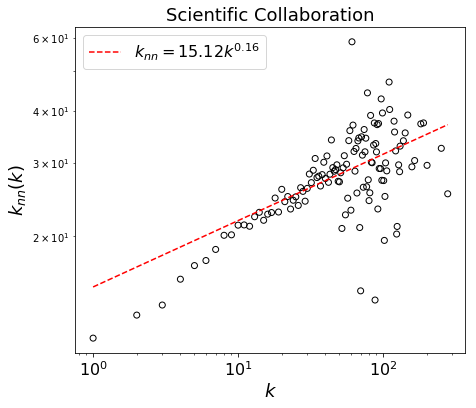

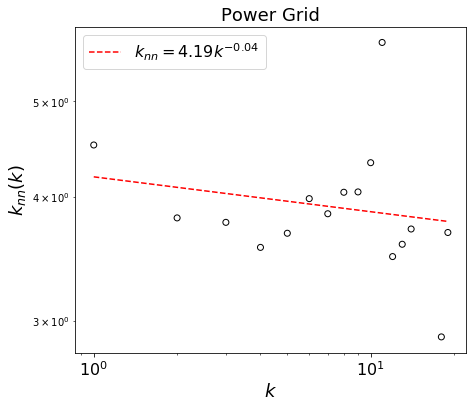

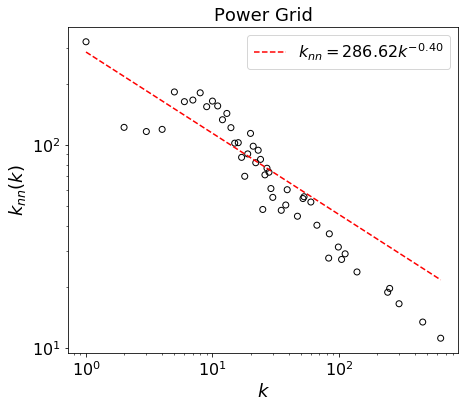

In [99]:
for i in range(len(Gs)):
    G = Gs[i]
    
    # get knn and k values of graph
    k_list, knn_list = get_k_and_knn(G)
    
    # get parameters of fitted line
    popt = fit_curve(k_list, knn_list)

    # generate x and y for the fit
    x_fit = np.arange(min(k_list),max(k_list),.01)
    y_fit = [func(z, popt[0], popt[1]) for z in x_fit]

    # plot graph:
    plt.figure(figsize=(7,6))
    plt.scatter(k_list, knn_list, facecolors='none', edgecolors='k')
    plt.title(names[i], fontsize=18)
    plt.ylabel("$k_{nn}(k)$", fontsize=18)
    plt.xlabel("$k$", fontsize=18)
    plt.plot(x_fit,y_fit,'r--',label= '$k_{nn}=%.2f k ^{%.2f}$' %(popt[0], popt[1]))
    ax = plt.gca()
    plt.loglog(basex=10, basey=10)
    plt.tick_params(axis='both', which='major', colors='k',labelsize=16)
    plt.legend(fontsize=16)


Estimating the coefficients for BA graphs:

Results: a = 209.46983744612257  and mu = -0.31234061716950207
Results: a = 441.58136795443914  and mu = -0.5733494500329285
Results: a = 590.0060466098846  and mu = -0.34188897504962423
Results: a = 1407.2086243478605  and mu = -0.5858589616920055
Results: a = 2079.0193870097833  and mu = -0.3471859422492525
Results: a = 1591.9980899092127  and mu = -0.3079919488547855
Mean value of coefficient mu: -0.41143598250801633
Min value: -0.5858589616920055
Max value: -0.3079919488547855


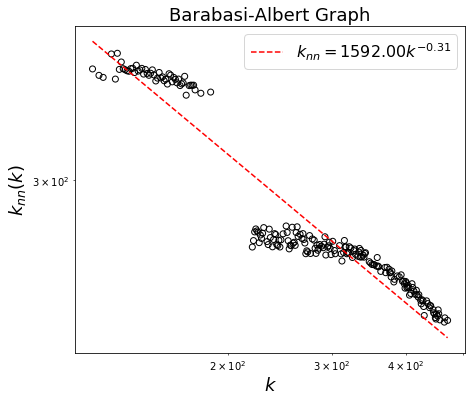

In [143]:
# different realisations of BA
n = [100, 100, 200, 200, 500, 500]
m = [50, 80, 100, 160, 250, 220]

# store all coefficient mu values
mu_list = []

for i, j in zip(n, m):
    # initialize BA graph
    G = barabasi_albert_graph(i, j)

    # get knn and k values of graph
    k_list, knn_list = get_k_and_knn(G)

    # get parameters of fitted line
    popt = fit_curve(k_list, knn_list)
    mu_list.append(popt[1])
    
# print statistics for mu
print('Mean value of coefficient mu:', sum(mu_list) / len(mu_list))
print('Min value:', min(mu_list))
print('Max value:', max(mu_list))

    
## Plot last BA graph, just to visualize
# generate x and y for the fit
x_fit = np.arange(min(k_list),max(k_list),.01)
y_fit = [func(z, popt[0], popt[1]) for z in x_fit]

# plot graph:
plt.figure(figsize=(7,6))
plt.scatter(k_list, knn_list, facecolors='none', edgecolors='k')
plt.title("Barabasi-Albert Graph", fontsize=18)
plt.ylabel("$k_{nn}(k)$", fontsize=18)
plt.xlabel("$k$", fontsize=18)
plt.plot(x_fit,y_fit,'r--',label= '$k_{nn}=%.2f k ^{%.2f}$' %(popt[0], popt[1]))
ax = plt.gca()
plt.loglog(basex=10, basey=10)
plt.tick_params(axis='both', which='major', colors='k',labelsize=16)
plt.legend(fontsize=16)

It is easy to see that the BA network is a disassortative networks, since μ < 0, for all realisations. As the number of edges m gets closer to the number of nodes, the network gets more and more diassortative. This would mean that, on the plot, the nodes will be more separated between the two ends of the line. 

Results: a = 2.654299088188913  and mu = 7.56875678619926e-09
Results: a = 3.825527163505824  and mu = 3.175173355528345e-08
Results: a = 3.033535431899508  and mu = 0.06599561004455769
Results: a = 3.3709221485250946  and mu = 0.027014418472845306
Results: a = 1.9145535491480923  and mu = 3.131662432433484e-08
Results: a = 4.113170656163071  and mu = 0.001838746694822018
Mean value of coefficient mu: 0.015808140974889945
Min value: 7.56875678619926e-09
Max value: 0.06599561004455769


c:\users\melanija\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


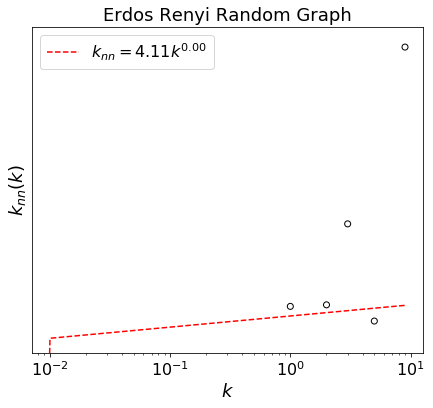

In [142]:
# different realisations of ER random graph
n = [100, 100, 200, 200, 500, 500]
m = [80, 150, 220, 250, 240, 760]

# store all coefficient mu values
mu_list = []

for i, j in zip(n, m):
    # initialize ER random graph
    G = nx.gnm_random_graph(i, j)

    # get knn and k values of graph
    k_list, knn_list = get_k_and_knn(G)

    # get parameters of fitted line
    popt = fit_curve(k_list, knn_list)
    mu_list.append(popt[1])
    
# print statistics for mu
print('Mean value of coefficient mu:', sum(mu_list) / len(mu_list))
print('Min value:', min(mu_list))
print('Max value:', max(mu_list))

    
## Plot last BA graph, just to visualize
# generate x and y for the fit
x_fit = np.arange(min(k_list),max(k_list),.01)
y_fit = [func(z, popt[0], popt[1]) for z in x_fit]

# plot graph:
plt.figure(figsize=(7,6))
plt.scatter(k_list, knn_list, facecolors='none', edgecolors='k')
plt.title("Erdos Renyi Random Graph", fontsize=18)
plt.ylabel("$k_{nn}(k)$", fontsize=18)
plt.xlabel("$k$", fontsize=18)
plt.plot(x_fit,y_fit,'r--',label= '$k_{nn}=%.2f k ^{%.2f}$' %(popt[0], popt[1]))
ax = plt.gca()
plt.loglog(basex=10, basey=10)
plt.tick_params(axis='both', which='major', colors='k',labelsize=16)
plt.legend(fontsize=16)

In this experiment, we can observe that the random graph acts as a neutral network, since the μ is in most cases very close to 0. 